<a href="https://colab.research.google.com/github/gabusi-alessandro/Deep-dive-on-Gratta-Vinci/blob/main/Gratta_e_Vinci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto Gratta&Vinci

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("Gratta_e_Vinci.xlsx") # importo il data frame dal file excel
df = df.loc[:,"Gratta e Vinci":"Link"] # limito il dataframe alle sole colonne di interesse

In [ ]:
print(df)

               Gratta e Vinci  Costo  Valore Atteso   Perdita  Perdita %  \
0                   Ping Pong    0.5       0.290034 -0.209966  -0.419932   
1               Testa o Croce    0.5       0.372082 -0.127918  -0.255836   
2           New Sette e Mezzo    1.0       0.595880 -0.404120  -0.404120   
3          Monetine Fortunate    1.0       0.590022 -0.409978  -0.409978   
4               Fai Scopa New    2.0       1.299930 -0.700070  -0.350035   
..                        ...    ...            ...       ...        ...   
57       Maxi Miliardario New   20.0      16.839133 -3.160867  -0.158043   
58          Ultra Numerissimi   20.0      15.608213 -4.391787  -0.219589   
59  New Extra Tutto per Tutto   20.0      15.593547 -4.406453  -0.220323   
60            Vinci in Grande   25.0      18.748276 -6.251724  -0.250069   
61                 Super Gold   25.0      19.499171 -5.500829  -0.220033   

    % Perdere Tutto  % Vittoria        1 000+       10 000+      100 000+  \
0         

## Funzione usate nel codice

In [ ]:
# MEDIA

def media(gruppo, colonna, dfr):
  if gruppo == 'all': # calcolo la media se sono stati scelti tutti i gruppi
    media = dfr[colonna].mean(numeric_only=True)
    return media
  else: # calcolo la media del singolo gruppo
    lista_indici = list() # creo a lista per lavorare solamente sulle righe del gruppo di riferimento
    for index in df.index:
      if dfr.loc[index, "Costo"] == gruppo:
        lista_indici.append(index) # aggiungo alla lista tutti gli indici delle righe del gruppo
    media = dfr.loc[lista_indici, colonna].mean(numeric_only=True)
    return round(media, 2)

In [ ]:
# VARIANZA

def varianza(gruppo, colonna, dfr):
  if gruppo == 'all': # calcolo la varianza su tutti i gruppi
      varianza  = dfr[colonna].var(numeric_only=True)
      return varianza
  else: # calcolo la varianza del gruppo (stessa modalità della media)
    lista_indici= list()
    for index in df.index:
      if dfr.loc[index, "Costo"] == gruppo:
        lista_indici.append(index)
    varianza = dfr.loc[lista_indici, colonna].var(numeric_only=True)
    return varianza

In [ ]:
# SCARTO INTERQUANTILE
def scarto_interquartile(gruppo, colonna, dfr):
  if gruppo == 'all': # calcolo lo scarto interquartile tra tutti i gruppi
    scarto = dfr[colonna].quantile(0.75) - dfr[colonna].quantile(0.25)
    return scarto
  else: # calcolo lo scarto interquartile del singolo gruppo (stessa modalità della media)
    lista_indici= list()
    for index in df.index:
      if dfr.loc[index, "Costo"] == gruppo:
        lista_indici.append(index)
    scarto = dfr.loc[lista_indici, colonna].quantile(0.75) - dfr.loc[lista_indici, colonna].quantile(0.25)
    return round(scarto,4)

In [ ]:
# SIMMETRIA
def simmetria(gruppo, colonna, dfr):
  if gruppo == 'all': # calcolo la simmetria tra tutti i gruppi
    simmetria = dfr[colonna].skew()
    return simmetria
  else: # calcolo la simmetria del singolo gruppo (stessa modalità della media)
    lista_indici = []
    for index in df.index:
      if dfr.loc[index, "Costo"] == gruppo:
        lista_indici.append(index)
    simmetria = df.loc[lista_indici, colonna].skew()
    return simmetria

In [ ]:
# CURTOSI
def curtosi(gruppo, colonna, dfr): # calcolo la curtosi tra tutti i gruppi
  if gruppo == 'all':
    curtosi = dfr[colonna].kurt()
    return curtosi
  else: # calcolo la curtosi del singolo gruppo (stessa modalità della media)
    lista_indici = []
    for index in df.index:
      if dfr.loc[index, "Costo"] == gruppo:
        lista_indici.append(index)
    curtosi = df.loc[lista_indici, colonna].kurt()
    return curtosi

## Selezione Parametri

### Selezione Gruppo

In [ ]:
# SCEGLIAMO IL GRUPPO SU CUI VOGLIAMO LAVORARE
gruppo = input("Inserisci il gruppo che vuoi selezionare: ")
gruppi = [0.5, 1, 2, 3, 5, 10, 15, 20, 25]
try: # mettiamo un controllo per evitare errori nel codice
  gruppo = float(gruppo)
  if gruppo not in gruppi:
    print("Il Gruppo scelto è sbagliato")
except: #
  gruppo = gruppo.lower() # se il gruppo non è numerico, salviamo il caso in cui vengono considerati tutti
  if gruppo != 'all':
    print("Il gruppo inserito non è corretto")

Inserisci il gruppo che vuoi selezionare: 5


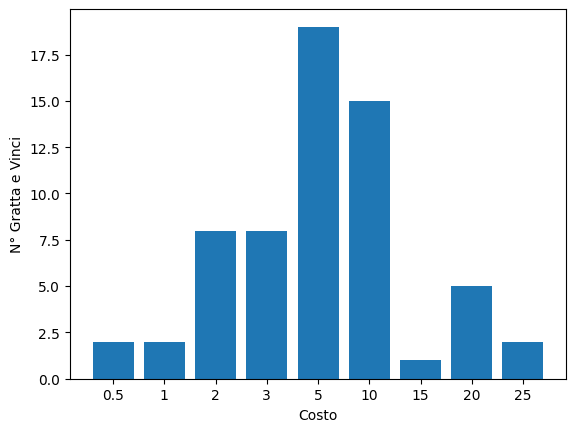

In [ ]:
# RAPPRESENTIAMO GRAFICAMENTE LA DISTRIBUZIONE DEI GRATTA E VINCI NEI GRUPPI
x = []
y = []
for gr in gruppi:
  x.append(str(gr))
  count = 0
  for i in range(len(df)):
    if df.loc[i, "Costo"] == float(gr):
      count += 1 # contiamo il numero di elementi per gruppo
    else:
      continue
  y.append(count)
  count = 0
plt.bar(x,y) # rappresentiamo il grafico a barre della distribuzione dei gruppi
plt.xlabel('Costo')
plt.ylabel('N° Gratta e Vinci')
plt.show()

In [ ]:
# VERIFICHIAMO LA MODA
moda = df["Costo"].mode()
print(moda)

0    5.0
Name: Costo, dtype: float64


### Selezione Colonna

In [ ]:
colonna = input("Seleziona la colonna su cui lavorare: ")
colonne = ["Costo", "Valore Atteso", "Perdita", "Perdita %","% Perdere Tutto", "% Vittoria", "1 000+", "10 000+", "100 000+", "Vincita Max", "Moltiplicatore Max", "Numero Biglietti", "Somma Biglietti"]

if colonna not in colonne: # mettiamo un controllo per evitare errori nel codice
  print("La colonna selezionata non è corretta")

Seleziona la colonna su cui lavorare: Valore Atteso


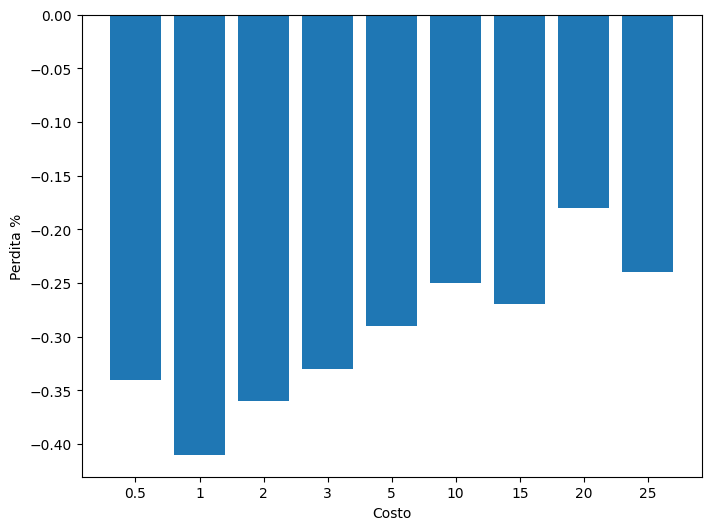

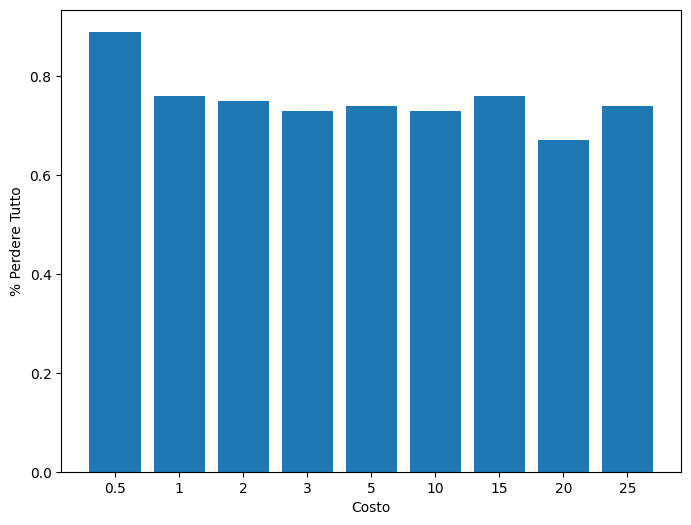

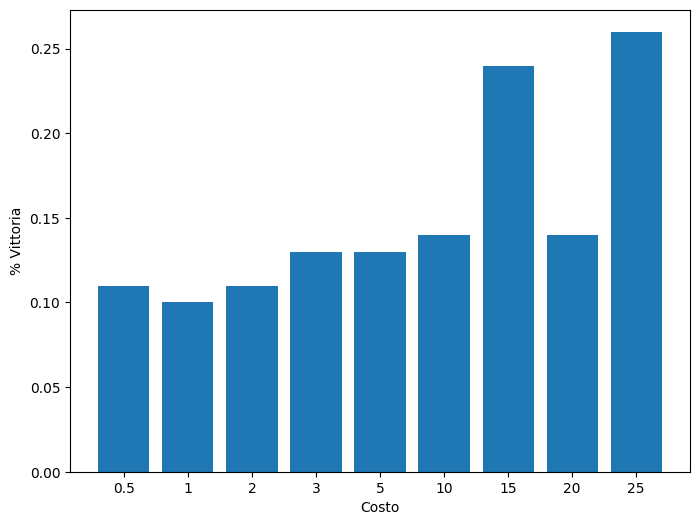

In [ ]:
for col in colonne[3:6]:
  x = []
  y = []
  for gr in gruppi:
    x.append(str(gr))
    media_gr = media(gr, col, df)
    y.append(media_gr)

  plt.figure(figsize=(8,6))
  plt.bar(x, y) # rappresentiamo la media della colonna di riferimento per ogni gruppo
  plt.xlabel("Costo")
  plt.ylabel(col)
  plt.show()
  print("")


In [ ]:
# Creiamo una lista con le sole colonne utili per i calcoli
colonne_stat = colonne.copy()
# colonne_stat.remove("Costo")
colonne_stat.remove("Perdita")
colonne_stat.remove("Vincita Max" )
colonne_stat.remove("1 000+")
colonne_stat.remove("10 000+")
colonne_stat.remove("100 000+")
colonne_stat.remove("Numero Biglietti")
colonne_stat.remove("% Perdere Tutto")

## Visualizzazione Statistiche Descrittive

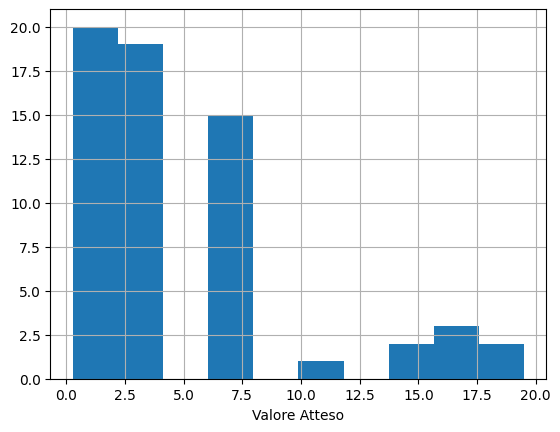

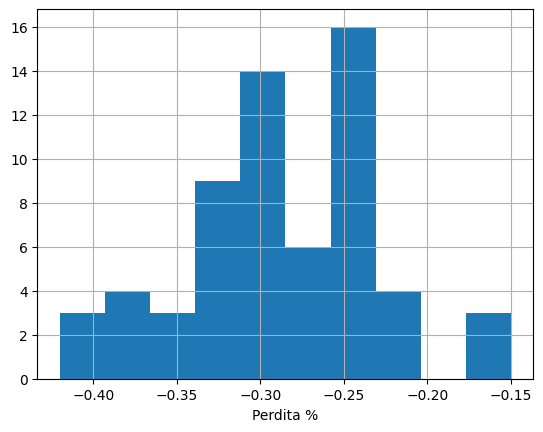

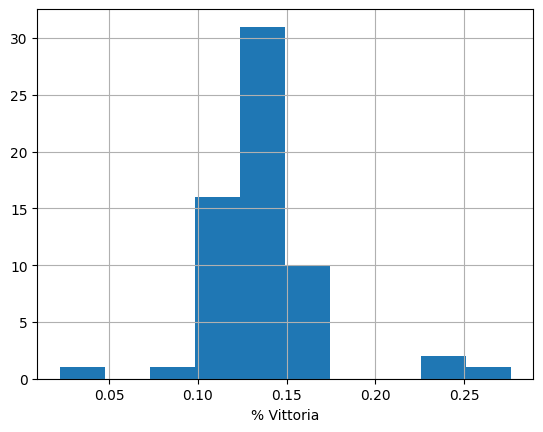

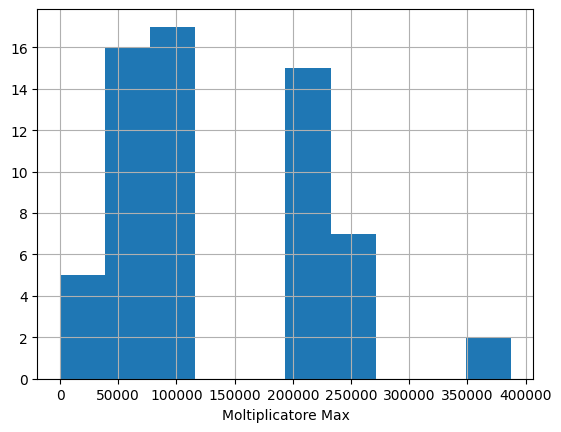

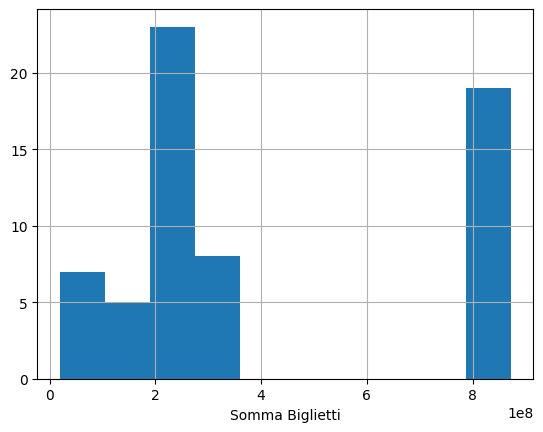

In [ ]:
  for col in colonne_stat[1:]:
    df.loc[:,col].hist() # creiamo un istrogramma per rappresentare la distribuzione delle varie colonne
    plt.xlabel(col)
    plt.show()

In [ ]:
# TABELLA STATISTICHE DESCRITTIVE GRUPPO
df_stat = pd.DataFrame(index=colonne_stat)
stat = ["Media", "Varianza", "Scarto Interquartile", "Simmetria", "Curtosi"]
media_col = list() # creiamo una lista per ogni statistica descrittiva di interesse
var_col = list()
scr_intq = list()
simm_col = []
curt_col = []
for col in colonne_stat: # per ogni colonna colcoliamo la statistica di riferimento
  media_col.append(media(gruppo, col, df))
  var_col.append(varianza(gruppo, col, df))
  simm_col.append(simmetria(gruppo, col, df))
  curt_col.append(curtosi(gruppo, col, df))

df_stat[stat[0]] = media_col #aggiungiamo i risultati ottenuti nel dataframe
df_stat[stat[1]] = var_col
df_stat[stat[3]] = simm_col
df_stat[stat[4]] = curt_col


print("STATISTICHE DESCRITTIVE GRUPPO", gruppo)
print(df_stat)


STATISTICHE DESCRITTIVE GRUPPO 5.0
                           Media      Varianza  Simmetria    Curtosi
Costo               5.000000e+00  0.000000e+00   0.000000   0.000000
Valore Atteso       3.570000e+00  1.929828e-03   0.942953   0.420040
Perdita %          -2.900000e-01  7.719314e-05   0.942953   0.420040
% Vittoria          1.300000e-01  8.465928e-04  -3.385098  13.436031
Moltiplicatore Max  1.284787e+05  7.308229e+09   2.821247   6.711482
Somma Biglietti     8.724000e+08  0.000000e+00   0.000000   0.000000


## Verifichiamo le differenze tra i gruppi

In [ ]:
# VARIANZA TOTALE VS VARIANZA TRA GRUPPI VS VARIANZA ENTRO I GRUPPI

In [ ]:
def varianza_tra_i_gruppi(colonna):
  vartrg = 0
  avg = media('all', colonna, df) #calcoliamo la media della colonna considerando tutti i gruppi
  for g in gruppi:
    index_g = []
    for index in df.index: # creiamo una lista con tutti gli indici del gruppo di riferimento
      if df.loc[index, "Costo"] == g :
        index_g.append(index)
    num_g = len(index_g)
    media_g = media(g, colonna, df) # calcoliamo la media del gruppo
    vartrg += (num_g*((media_g-avg)**2)) # calcoliamo la varianza tra i gruppi
  return vartrg / (len(df)-1)

In [ ]:
def varianza_entro_i_gruppi(colonna):
  varetg = 0
  for g in gruppi:
    index_g = []
    avg = media(g, colonna, df) # calcoliamo la media del gruppo
    for index in df.index: # creiamo una lista con tutti gli indici del gruppo di riferimento
      if df.loc[index, "Costo"] == g :
        index_g.append(index)
    for i in index_g:
      valore= df.loc[i, colonna]
      varetg += (valore - avg)**2 #calcoliamo la varianza entro i gruppi
  return varetg / (len(df)-1)

In [ ]:
# DIPENDENZA IN MEDIA
def rapporto_di_correlazione(colonna):
  rdc = varianza_tra_i_gruppi(colonna) / varianza('all', colonna, df) # calcoliamo il rapporto di correlazione
  return round(rdc, 4)

In [ ]:
for col in colonne_stat:
  print(rapporto_di_correlazione(col), col) # stampiamo il rapporto di correlazione per ogni colonna

# ATTENZIONE !!! -> Il rapporto di correlazione calcolato sulle colonne "10 000+" e "100 000+" supera 1, cosa impossibile visto che l'indice è normalizzato
# l'errore non è dovuto ai dati ma è un problema di approssimazione del programma

1.0 Costo
0.9977 Valore Atteso
0.8762 Perdita %
0.712 % Vittoria
0.6352 Moltiplicatore Max
1.0 Somma Biglietti


## CORRELAZIONI TRA GRUPPI

In [ ]:
def covarianza(colonna_a, colonna_b):
  n = len(df)
  avg_a = media('all', colonna_a, df) # calcoliamo la media di tutti i gruppi della colonna a
  avg_b = media('all', colonna_b, df) # calcoliamo la media di tutti i gruppi della colonna b
  sommatoria = 0
  for i in range(n):
    valore = df.loc[i, colonna_a] * df.loc[i, colonna_b]
    sommatoria += valore # calcoliamo la somma dei prodotti
  covarianza = (sommatoria/n) - (avg_a*avg_b) # calcoliamo la covarianza
  return covarianza


In [ ]:
def correlazione(colonna_a, colonna_b):
  correlazione = df.corrwith(df[colonna_a], axis=0, numeric_only=True) # calcoliamo la correlazione
  correlazione = correlazione[colonna_b]
  return correlazione

In [ ]:
print(correlazione("% Vittoria","Valore Atteso"))

0.5568323008082737


In [ ]:
mdc = pd.DataFrame(index = colonne_stat) #creiamo la matrice di correlazione
for col in colonne_stat:
  lst_cor = list() # creiamo una lista dove inseriamo la correlazione di ogni colonna con quella di riferimento (col)
  for c1 in colonne_stat:
    cor = correlazione(col, c1)
    lst_cor.append(cor)
  mdc[col] = [lst_cor[0], lst_cor[1],lst_cor[2], lst_cor[3],lst_cor[4], lst_cor[5]] #lst_cor[6], lst_cor[7], lst_cor[8], lst_cor[9], lst_cor[10]
print(mdc)

                       Costo  Valore Atteso  Perdita %  % Vittoria  \
Costo               1.000000       0.997823   0.800131    0.586246   
Valore Atteso       0.997823       1.000000   0.809869    0.556832   
Perdita %           0.800131       0.809869   1.000000    0.371415   
% Vittoria          0.586246       0.556832   0.371415    1.000000   
Moltiplicatore Max  0.720515       0.716438   0.731396    0.437303   
Somma Biglietti    -0.334668      -0.343135  -0.021604   -0.131815   

                    Moltiplicatore Max  Somma Biglietti  
Costo                         0.720515        -0.334668  
Valore Atteso                 0.716438        -0.343135  
Perdita %                     0.731396        -0.021604  
% Vittoria                    0.437303        -0.131815  
Moltiplicatore Max            1.000000        -0.039836  
Somma Biglietti              -0.039836         1.000000  


In [ ]:
# la stessa cosa fatta sopra si può fare molto più rapidamente scrivendo
print(df.corr(numeric_only=True)) #continuo a non utilizzarla perché ho rimosso delle colonne dal calcolo ma non dal DataFrame

                       Costo  Valore Atteso   Perdita  Perdita %  \
Costo               1.000000       0.997823 -0.964032   0.800131   
Valore Atteso       0.997823       1.000000 -0.944405   0.809869   
Perdita            -0.964032      -0.944405  1.000000  -0.725084   
Perdita %           0.800131       0.809869 -0.725084   1.000000   
% Perdere Tutto    -0.429212      -0.437282  0.377483  -0.433373   
% Vittoria          0.586246       0.556832 -0.678561   0.371415   
1 000+              0.734434       0.765773 -0.575266   0.622510   
10 000+             0.651217       0.671317 -0.541068   0.739403   
100 000+            0.637293       0.625468 -0.656434   0.607531   
Vincita Max         0.971646       0.974526 -0.916563   0.756527   
Moltiplicatore Max  0.720515       0.716438 -0.704710   0.731396   
Numero Biglietti   -0.298253      -0.286371  0.332798  -0.180491   
Somma Biglietti    -0.334668      -0.343135  0.285568  -0.021604   

                    % Perdere Tutto  % Vittoria

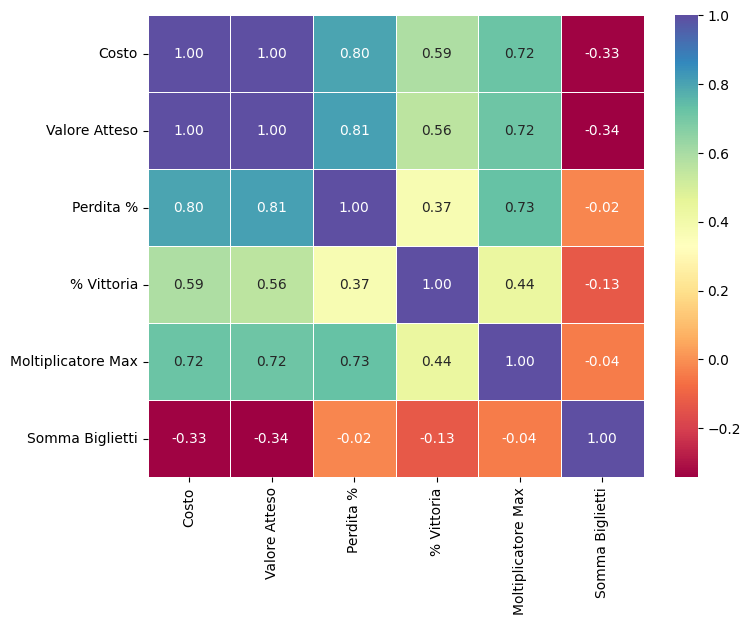

In [ ]:
# MOSTRIAMO LA MATRICE DI CORRELAZIONE
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(mdc, annot=True, cmap="Spectral",fmt ='.2f', linewidths= .5)
plt.show()

In [ ]:
# COEFFICIENTE DI CORRELAZIONE
def coefficiente_di_correlazione(colonna_a, colonna_b):
  erre_quadro = correlazione(colonna_a, colonna_b)**2
  return erre_quadro

In [ ]:
mdd = pd.DataFrame(index = colonne_stat) #creiamo la matrice di determinazione (coff di determinazione R^2)
# usiamo lo stesso metodo della matrice di correlazione
for col in colonne_stat:
  lst_r = list()
  for c1 in colonne_stat:
    cc = coefficiente_di_correlazione(col, c1)
    lst_r.append(cc)
  mdd[col] = [lst_r[0], lst_r[1],lst_r[2], lst_r[3],lst_r[4], lst_r[5]] #lst_r[6], lst_r[7], lst_r[8], lst_r[9], lst_r[10]
print(mdd)

                       Costo  Valore Atteso  Perdita %  % Vittoria  \
Costo               1.000000       0.995651   0.640210    0.343684   
Valore Atteso       0.995651       1.000000   0.655888    0.310062   
Perdita %           0.640210       0.655888   1.000000    0.137949   
% Vittoria          0.343684       0.310062   0.137949    1.000000   
Moltiplicatore Max  0.519141       0.513283   0.534940    0.191234   
Somma Biglietti     0.112003       0.117742   0.000467    0.017375   

                    Moltiplicatore Max  Somma Biglietti  
Costo                         0.519141         0.112003  
Valore Atteso                 0.513283         0.117742  
Perdita %                     0.534940         0.000467  
% Vittoria                    0.191234         0.017375  
Moltiplicatore Max            1.000000         0.001587  
Somma Biglietti               0.001587         1.000000  


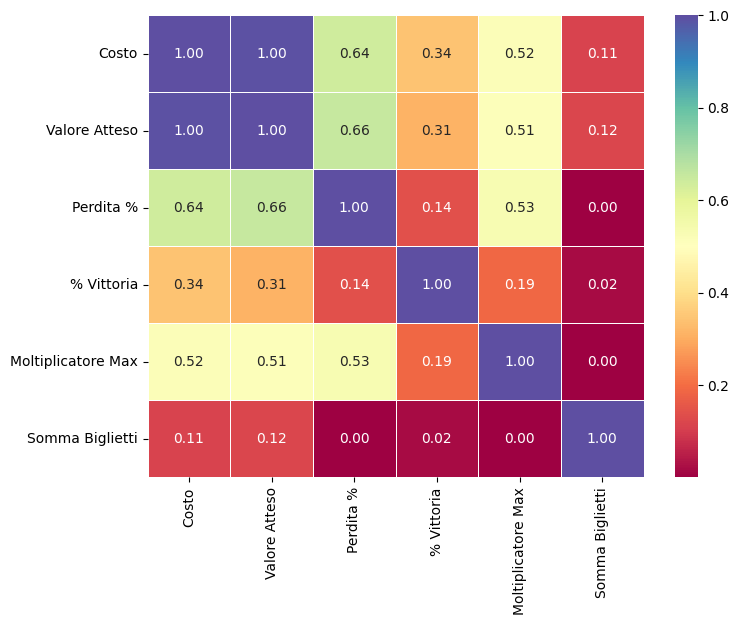

In [ ]:
# HEATMAP MATRICE DI DETERMINAZIONE
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(mdd, annot=True, cmap="Spectral",fmt ='.2f', linewidths= .5)
plt.show()

In [ ]:
# RETTA DI REGRESSIONE --> y = a + bx
def retta_di_regressione(colonna_a, colonna_b):
  avg_a = media('all', colonna_a, df)
  avg_b = media('all', colonna_b, df)
  beta = covarianza(colonna_a, colonna_b) / varianza('all', colonna_a, df) # calcoliamo il parametro beta
  alfa = avg_b - (beta * avg_a) # calcoliamo il parametro alfa
  retta = "y =", round(float(alfa), 2),"+" , round(float(beta),2),"x" # scriviamo l'equazione della retta
  return retta, alfa, beta

In [ ]:
# RAPPRESENTIAMO UNA RETTA

def retta_grafico(colonna_a, colonna_b):
  alfa = retta_di_regressione(colonna_a, colonna_b)[1] # prendiamo il parametro alfa
  beta = retta_di_regressione(colonna_a, colonna_b)[2] # prendiamo il parametro beta
  asse_x = []
  asse_y = []
  for i in df.index:
    x = df.loc[i, colonna_a]
    y = (alfa + (beta * x)) # stimiamo il valore di ogni y usando la retta di regressione
    asse_x.append(x)
    asse_y.append(y)
  plt.plot(asse_x, asse_y)
  plt.plot(df[colonna_a], df[colonna_b], "ro")
  plt.xlabel(colonna_a)
  plt.ylabel(colonna_b)
  return plt.show()


Costo Valore Atteso


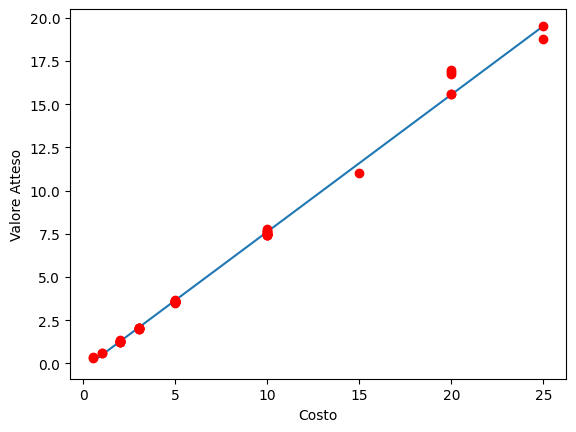

None

Costo Perdita %


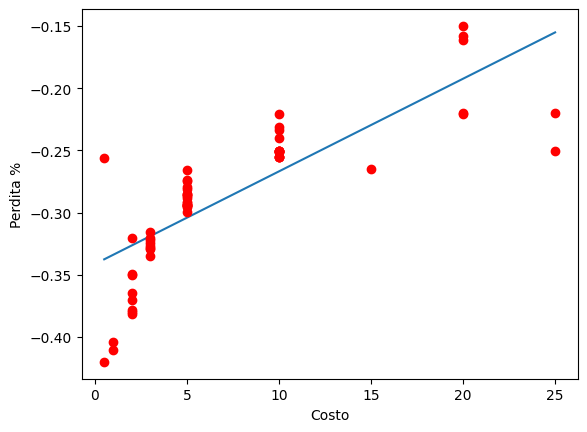

None

Costo % Vittoria


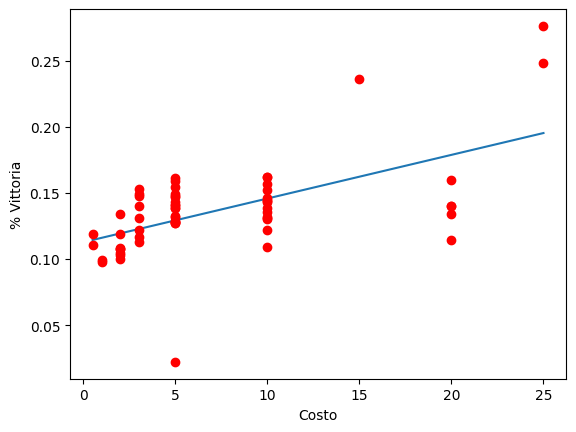

None

Costo Moltiplicatore Max


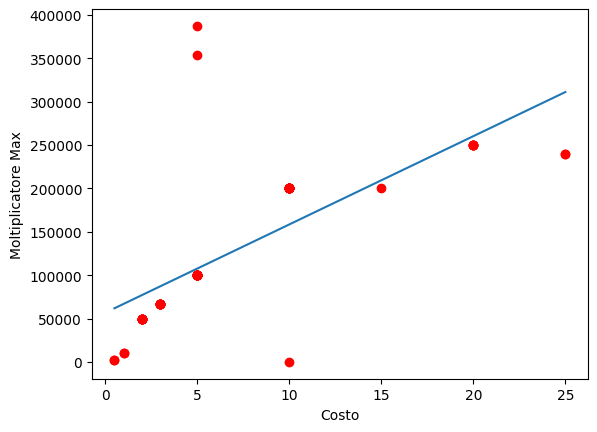

None

Costo Somma Biglietti


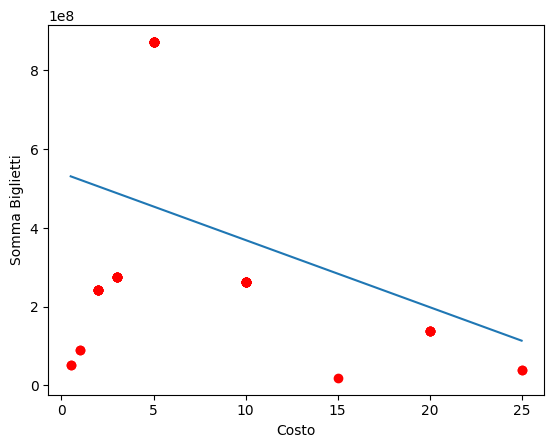

None

Valore Atteso Perdita %


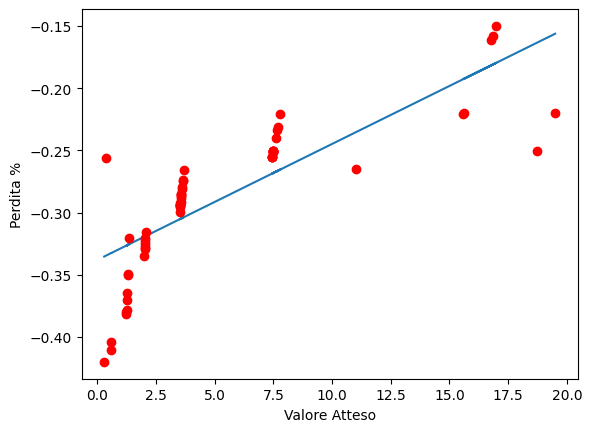

None

Valore Atteso % Vittoria


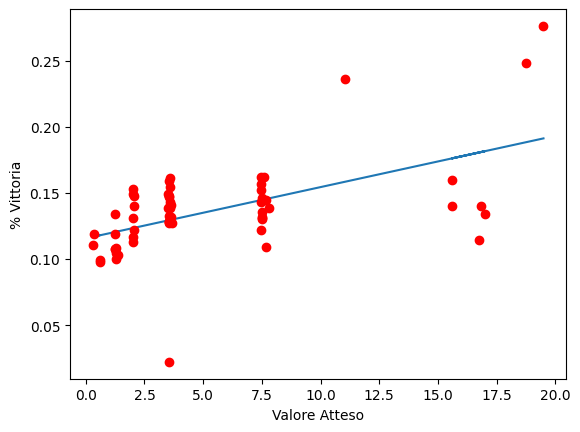

None

Valore Atteso Moltiplicatore Max


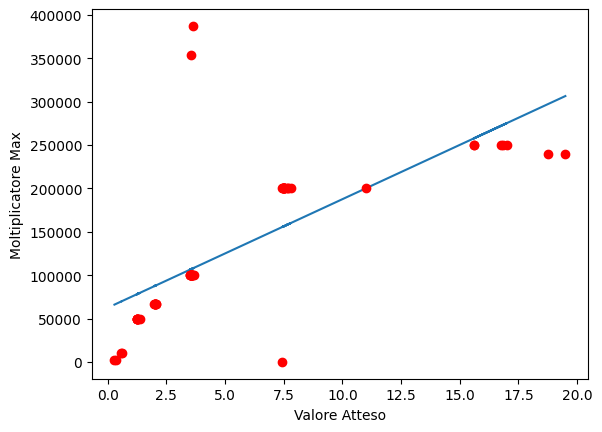

None

Valore Atteso Somma Biglietti


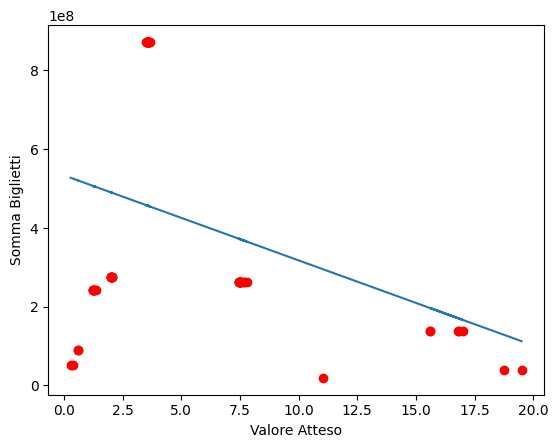

None

Perdita % Valore Atteso


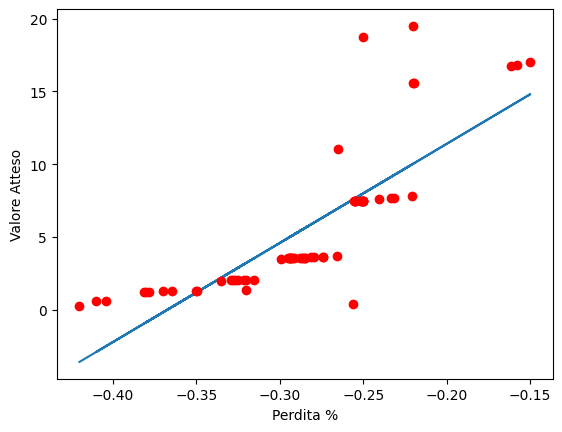

None

Perdita % % Vittoria


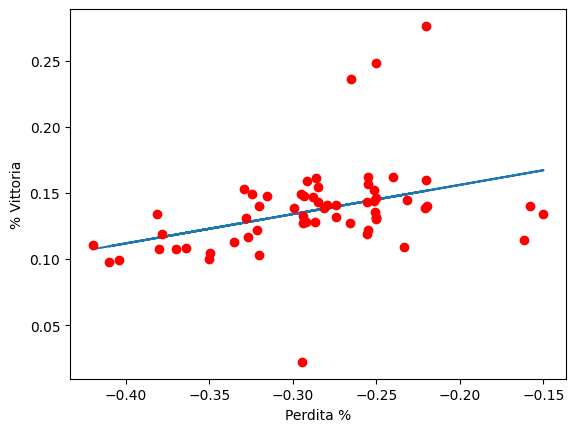

None

Perdita % Moltiplicatore Max


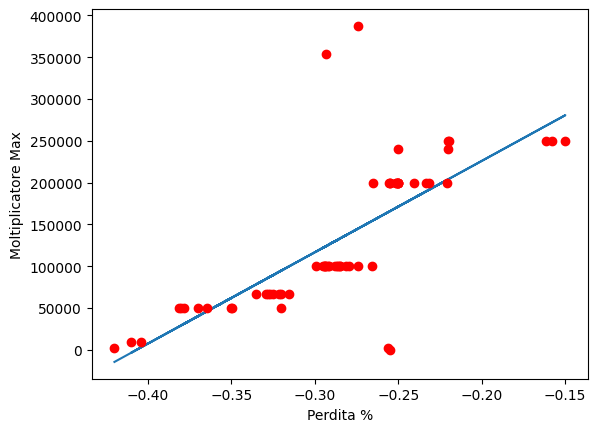

None

Perdita % Somma Biglietti


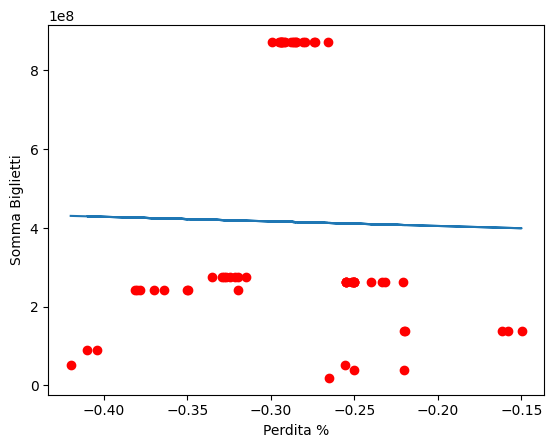

None

% Vittoria Valore Atteso


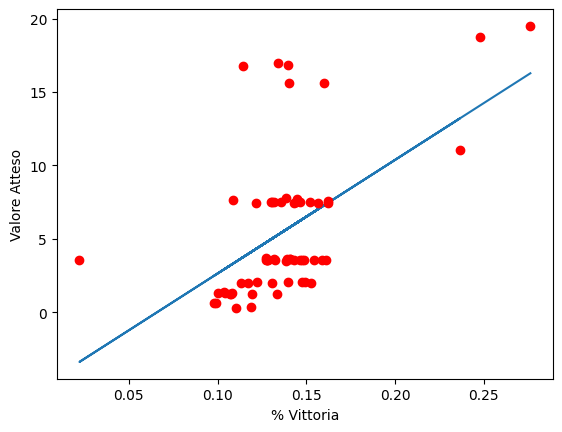

None

% Vittoria Perdita %


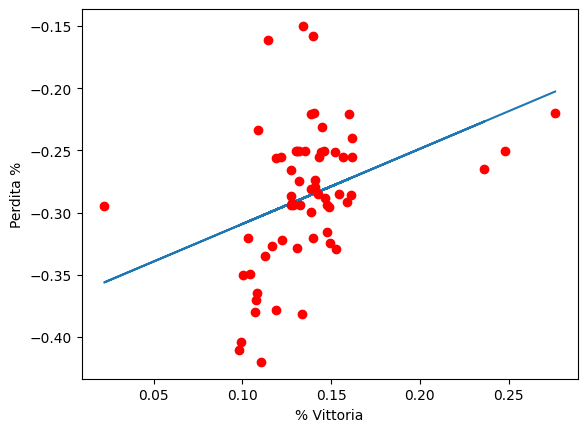

None

% Vittoria Moltiplicatore Max


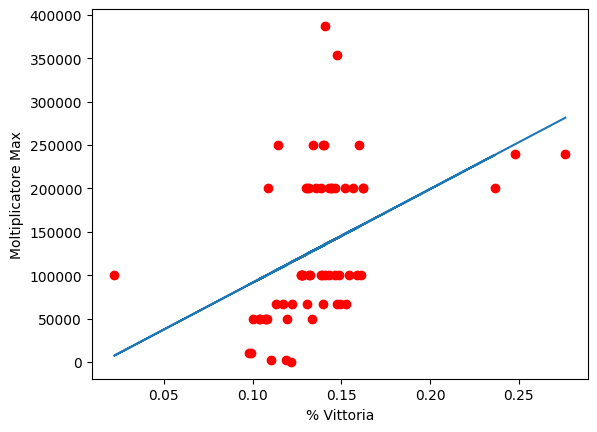

None

% Vittoria Somma Biglietti


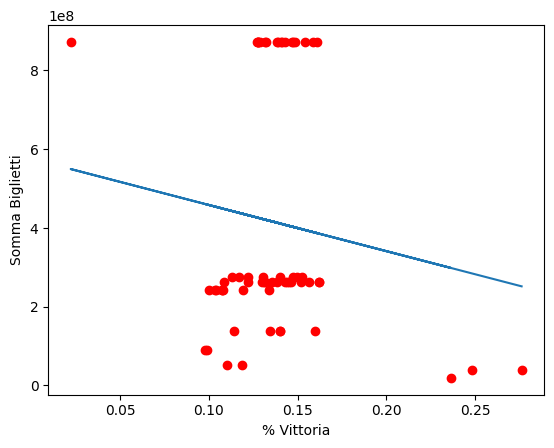

None

Moltiplicatore Max Valore Atteso


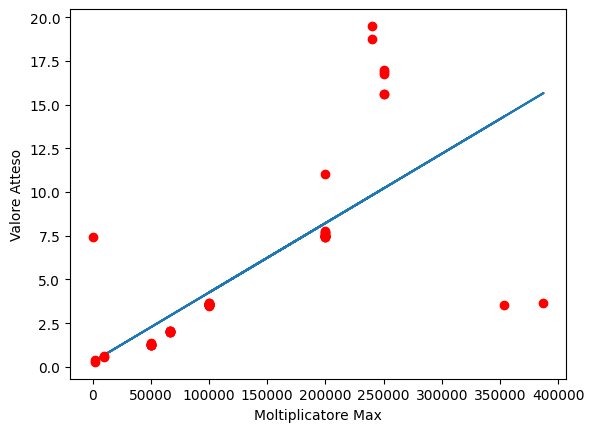

None

Moltiplicatore Max Perdita %


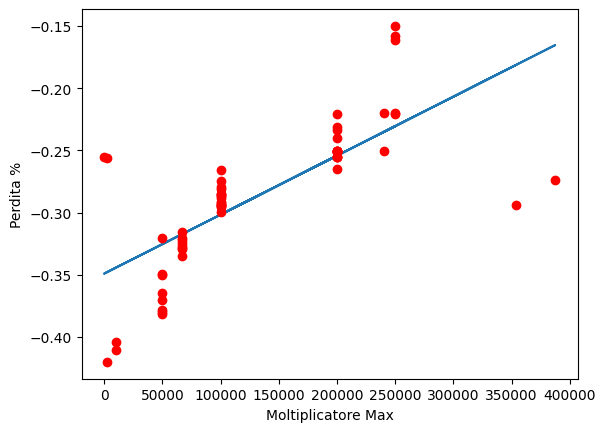

None

Moltiplicatore Max % Vittoria


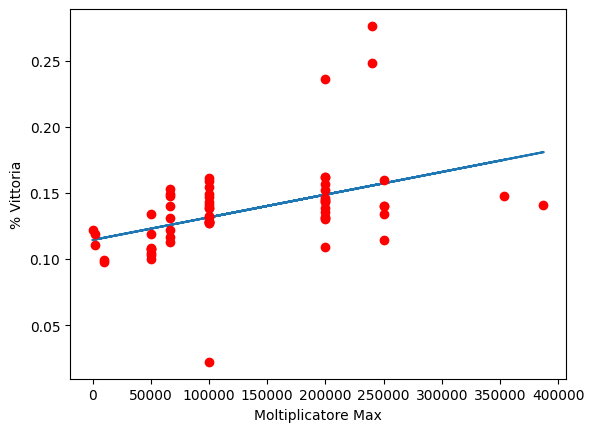

None

Moltiplicatore Max Somma Biglietti


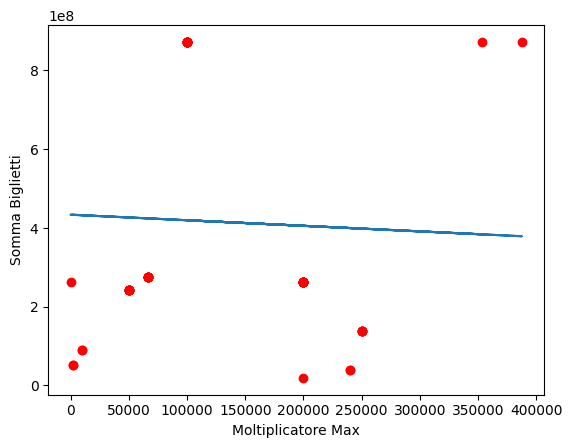

None

Somma Biglietti Valore Atteso


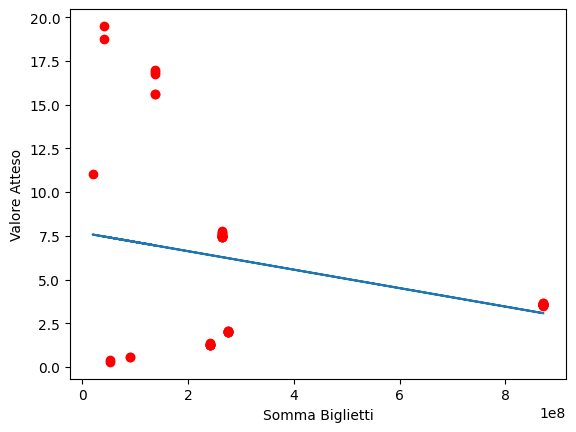

None

Somma Biglietti Perdita %


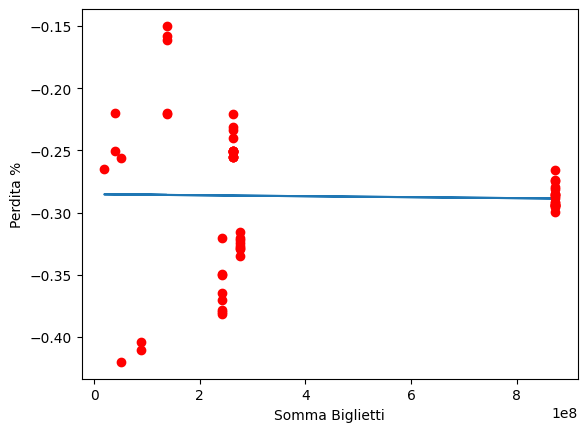

None

Somma Biglietti % Vittoria


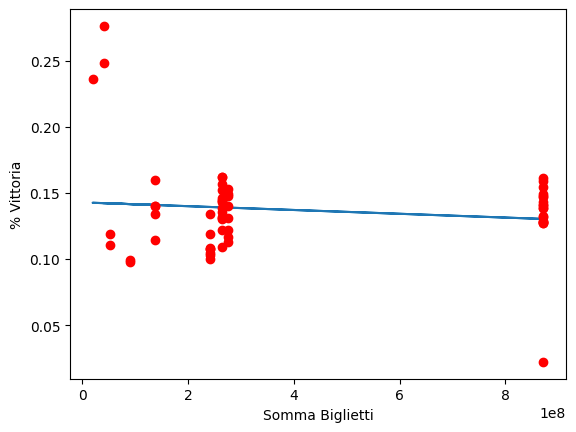

None

Somma Biglietti Moltiplicatore Max


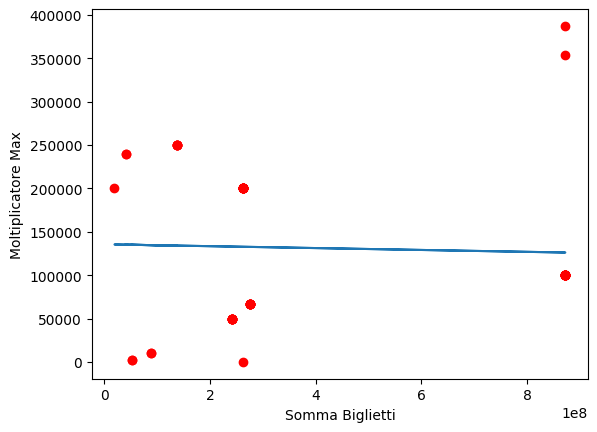

None



In [ ]:
# RAPPRESENTIAMO TUTTE LE POSSIBILI RETTE DI REGRESSIONE
pos = 1
for c1 in colonne_stat:
  while pos <= (len(colonne_stat)-1):
    if c1 == colonne_stat[pos]:
      pos += 1
      continue
    else:
      print(c1, colonne_stat[pos])
      print(retta_grafico(c1, colonne_stat[pos]))
      print("")
      pos += 1
  if pos <= len(colonne_stat) -1:
    continue
  else:
    pos = 1

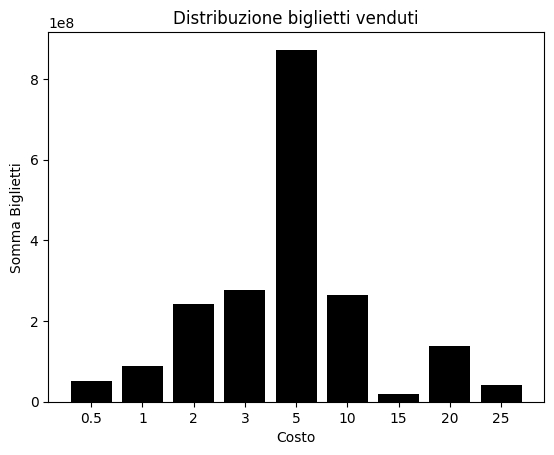

In [ ]:
x = []
y = []

for i in range(len(df)):
  val = df.loc[i, "Somma Biglietti"]
  if val in y:
    continue
  y.append(val)

for g in gruppi:
  x.append(str(g))

plt.bar(x,y, color="black")
plt.xlabel("Costo")
plt.ylabel("Somma Biglietti")
plt.title("Distribuzione biglietti venduti")
plt.show()